The following code wil implement MNM candies detection and color classification
1. For logic of each function pleas see function description within `utils.py `file.
2. For further discussion about the results and the techniques that where used for the 
3. Fo

Import the necessary packages



In [1]:
import cv2
from IPython.display import clear_output

Import the necessary functions



In [1]:
from utils import detect_color,crop_circle_pixels,bgr_to_hsv,draw_circles, \
scatter_plot_radius_vs_color,detect_circles, circle_raiduses_dict_to_df,plot_bgr_image

Read image 

In [3]:
img = cv2.imread("data/mnm_image.png", cv2.IMREAD_COLOR)

Define configs and variables

1. `colors_rgb_map` - For detection circles color
2. `color_limits` - For M&M candies color classification
3. `color_circel_radiuses` - Object that holds the detected radii per color

In [4]:
colors_rgb_map = {
    "red" :(255, 0, 0),
    "orange" :(255,165,0),
    "blue" :(0,0,255),
    "green" :(0, 255, 0),
    "yellow" :(255,255,0),
    "brown" :(150,75,0)
}
color_limits = {
    "red":((160, 170, 100), (180,240,255)),
    "orange" :((0,120,170),(13,255,255)),
    "blue":((105,50,50), (135,255,255)),
    "green":((32,50,100), (100,255,255)),
    "yellow":((20, 100, 100), (30, 255, 255)),
    "brown":((0, 0, 52), (10 ,200,  120))
} 
    
color_circel_radiuses = {
    "red":[],
    "orange":[],
    "blue":[],
    "green":[],
    "yellow":[],
    "brown":[]
}

Get detected circles centers a radii



In [ ]:
detected_circles = detect_circles(image = img)

Per each detected circle perform 
1. color classification and ad it to the orogon image
2. Append results to `color_circel_radiuses`
3. Add detected circle and color to the origin image

In [5]:
if detected_circles is not None:
    for pt in detected_circles[0,:]:        
        # Get center and radius 
        center, r = (int(pt[0]),int(pt[1])), int(pt[2])

        # Crop pixels inside the circle
        bgr_pixel_list = crop_circle_pixels(image = img, center = center,  radius = r)

        # Convert the BGR pixels to HSV color space
        hsv_pixel_list = bgr_to_hsv(bgr_pixel_list = bgr_pixel_list)

        # Detect color based on the HSV color limits
        color = detect_color(pixels_list_hsv = hsv_pixel_list, color_limits_map = color_limits)

        # Append the radius to the list of the detected color
        color_circel_radiuses[color].append(r)

        # Draw the circumference of the circle.
        img = draw_circles(img =img,center=center, radius = r,color = colors_rgb_map[color][::-1],thickness = 5)

        # Draw a small circle (of radius 1) to show the center.
        img = draw_circles(img =img,center=center, radius = 1,color = colors_rgb_map[color][::-1], thickness = 2)

        # Show the image with detected circles
        clear_output(wait=True)
        plot_bgr_image(img)
        


![image](https://raw.githubusercontent.com/razisamuely/MnM-candies-detection/main/data/HoughCircles_gif.gif)

Convert dictionary of colors and radiuses to data frame

In [6]:
df = circle_raiduses_dict_to_df(color_circel_radiuses = color_circel_radiuses )

Plot radiuses against color

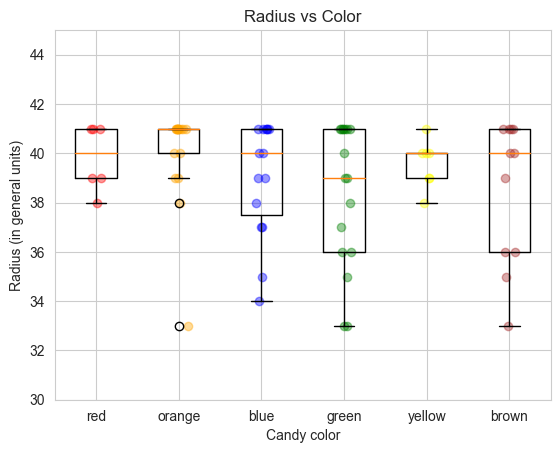

In [7]:
scatter_plot_radius_vs_color(df = df)